<a href="https://www.kaggle.com/code/muhammeteneselikolu/water-potability-visualization-and-dt-classifier?scriptVersionId=166337074" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd # data processing, CSV file I/O
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/kaggle/input/water-quality-and-potability/water_potability.csv')

In [3]:
data.shape #rows,columns

(3276, 10)

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Data Cleaning** 


**Right here we have null values so for the right solution we have to clean this values**

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.isnull().sum() #we have 3276 rows and there is a 781 row missing value suflate data this is highest we already have small data and there is almost 1000 rows is null value
# so we have 2 options -remove the data (which is not okay because we have small data) 
#                      -fill the data (fill the data which mean value (we will use this))


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data.fillna(data.mean(),inplace=True) # so where ever ph=null it will get replaced with 7.080795, sulfate=null get replaced with 333.775777, Trihalomethanes=null get replaced with 66.396293

In [8]:
data  #we removed null values permanently data cleaning has been done

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# **Exploratoy Data Analysis**

In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Checking if we need to do Dimensonility Reduction**

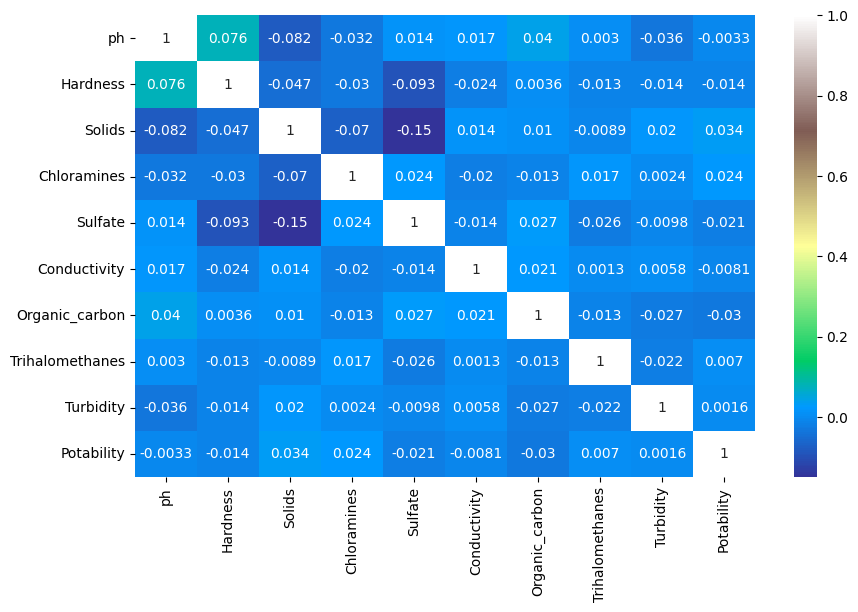

In [10]:
sns.heatmap(data.corr(),annot= True,cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#we are trying the reduce the dimension to which are correlating for that we are looking for the similarity of the features with this chart
#because less feature is making easy to the predict but we have so small similarity of the features and we cant use the remove feature

### Lets check the Outlier using Box Plot

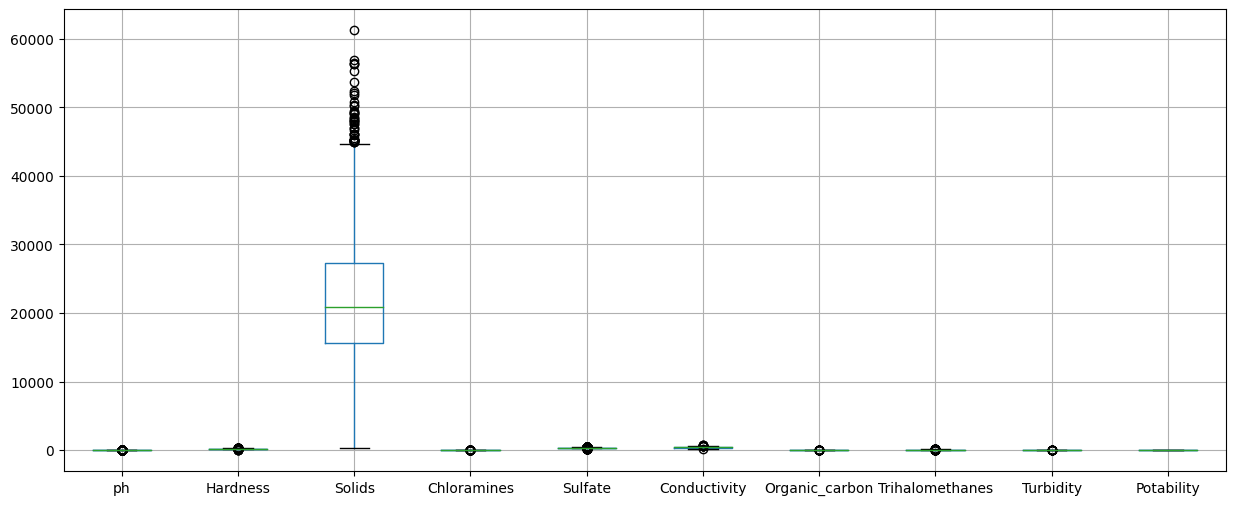

In [11]:
data.boxplot(figsize=(15,6))
plt.show()

#You can see outliers but if we remove this outliers we cant have good predict the result will be closer to good water 
#Our purpose in not removing outlier is to estimate from a wide range of data.

In [12]:
data['Solids'].describe()
#this data shows us a mean value is a 22014 around and %75 is a 27000 around %25 around 15000 

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

**Not removing the Outliers because they may be important to decide the quality of water**

#  **More Exploratory Data Analysis**

In [13]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [14]:
data.shape

(3276, 10)

In [15]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

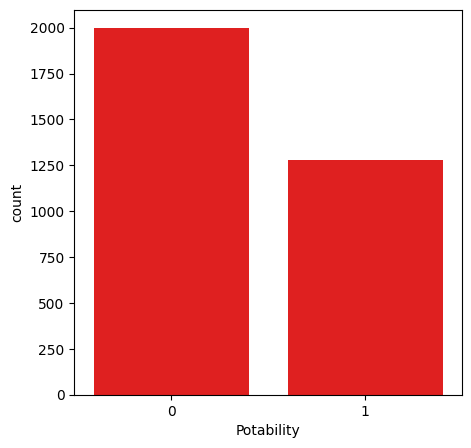

In [16]:
plt.figure(figsize=(5,5))
sns.countplot( x=data["Potability"], color="red")
plt.show()

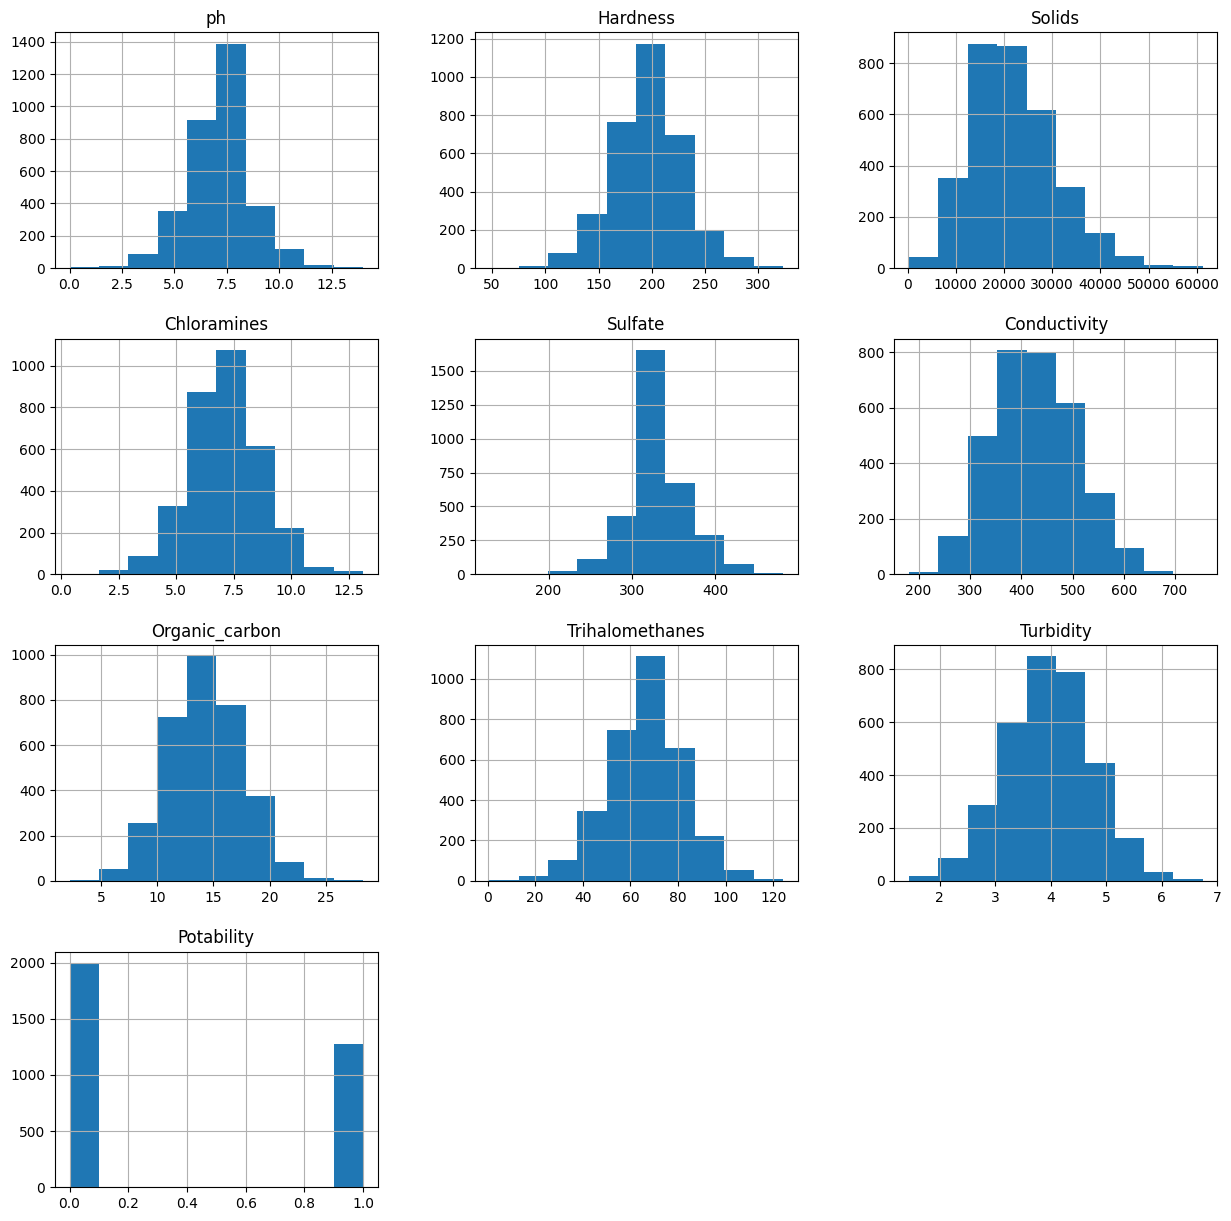

In [17]:
data.hist(figsize=(15,15))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


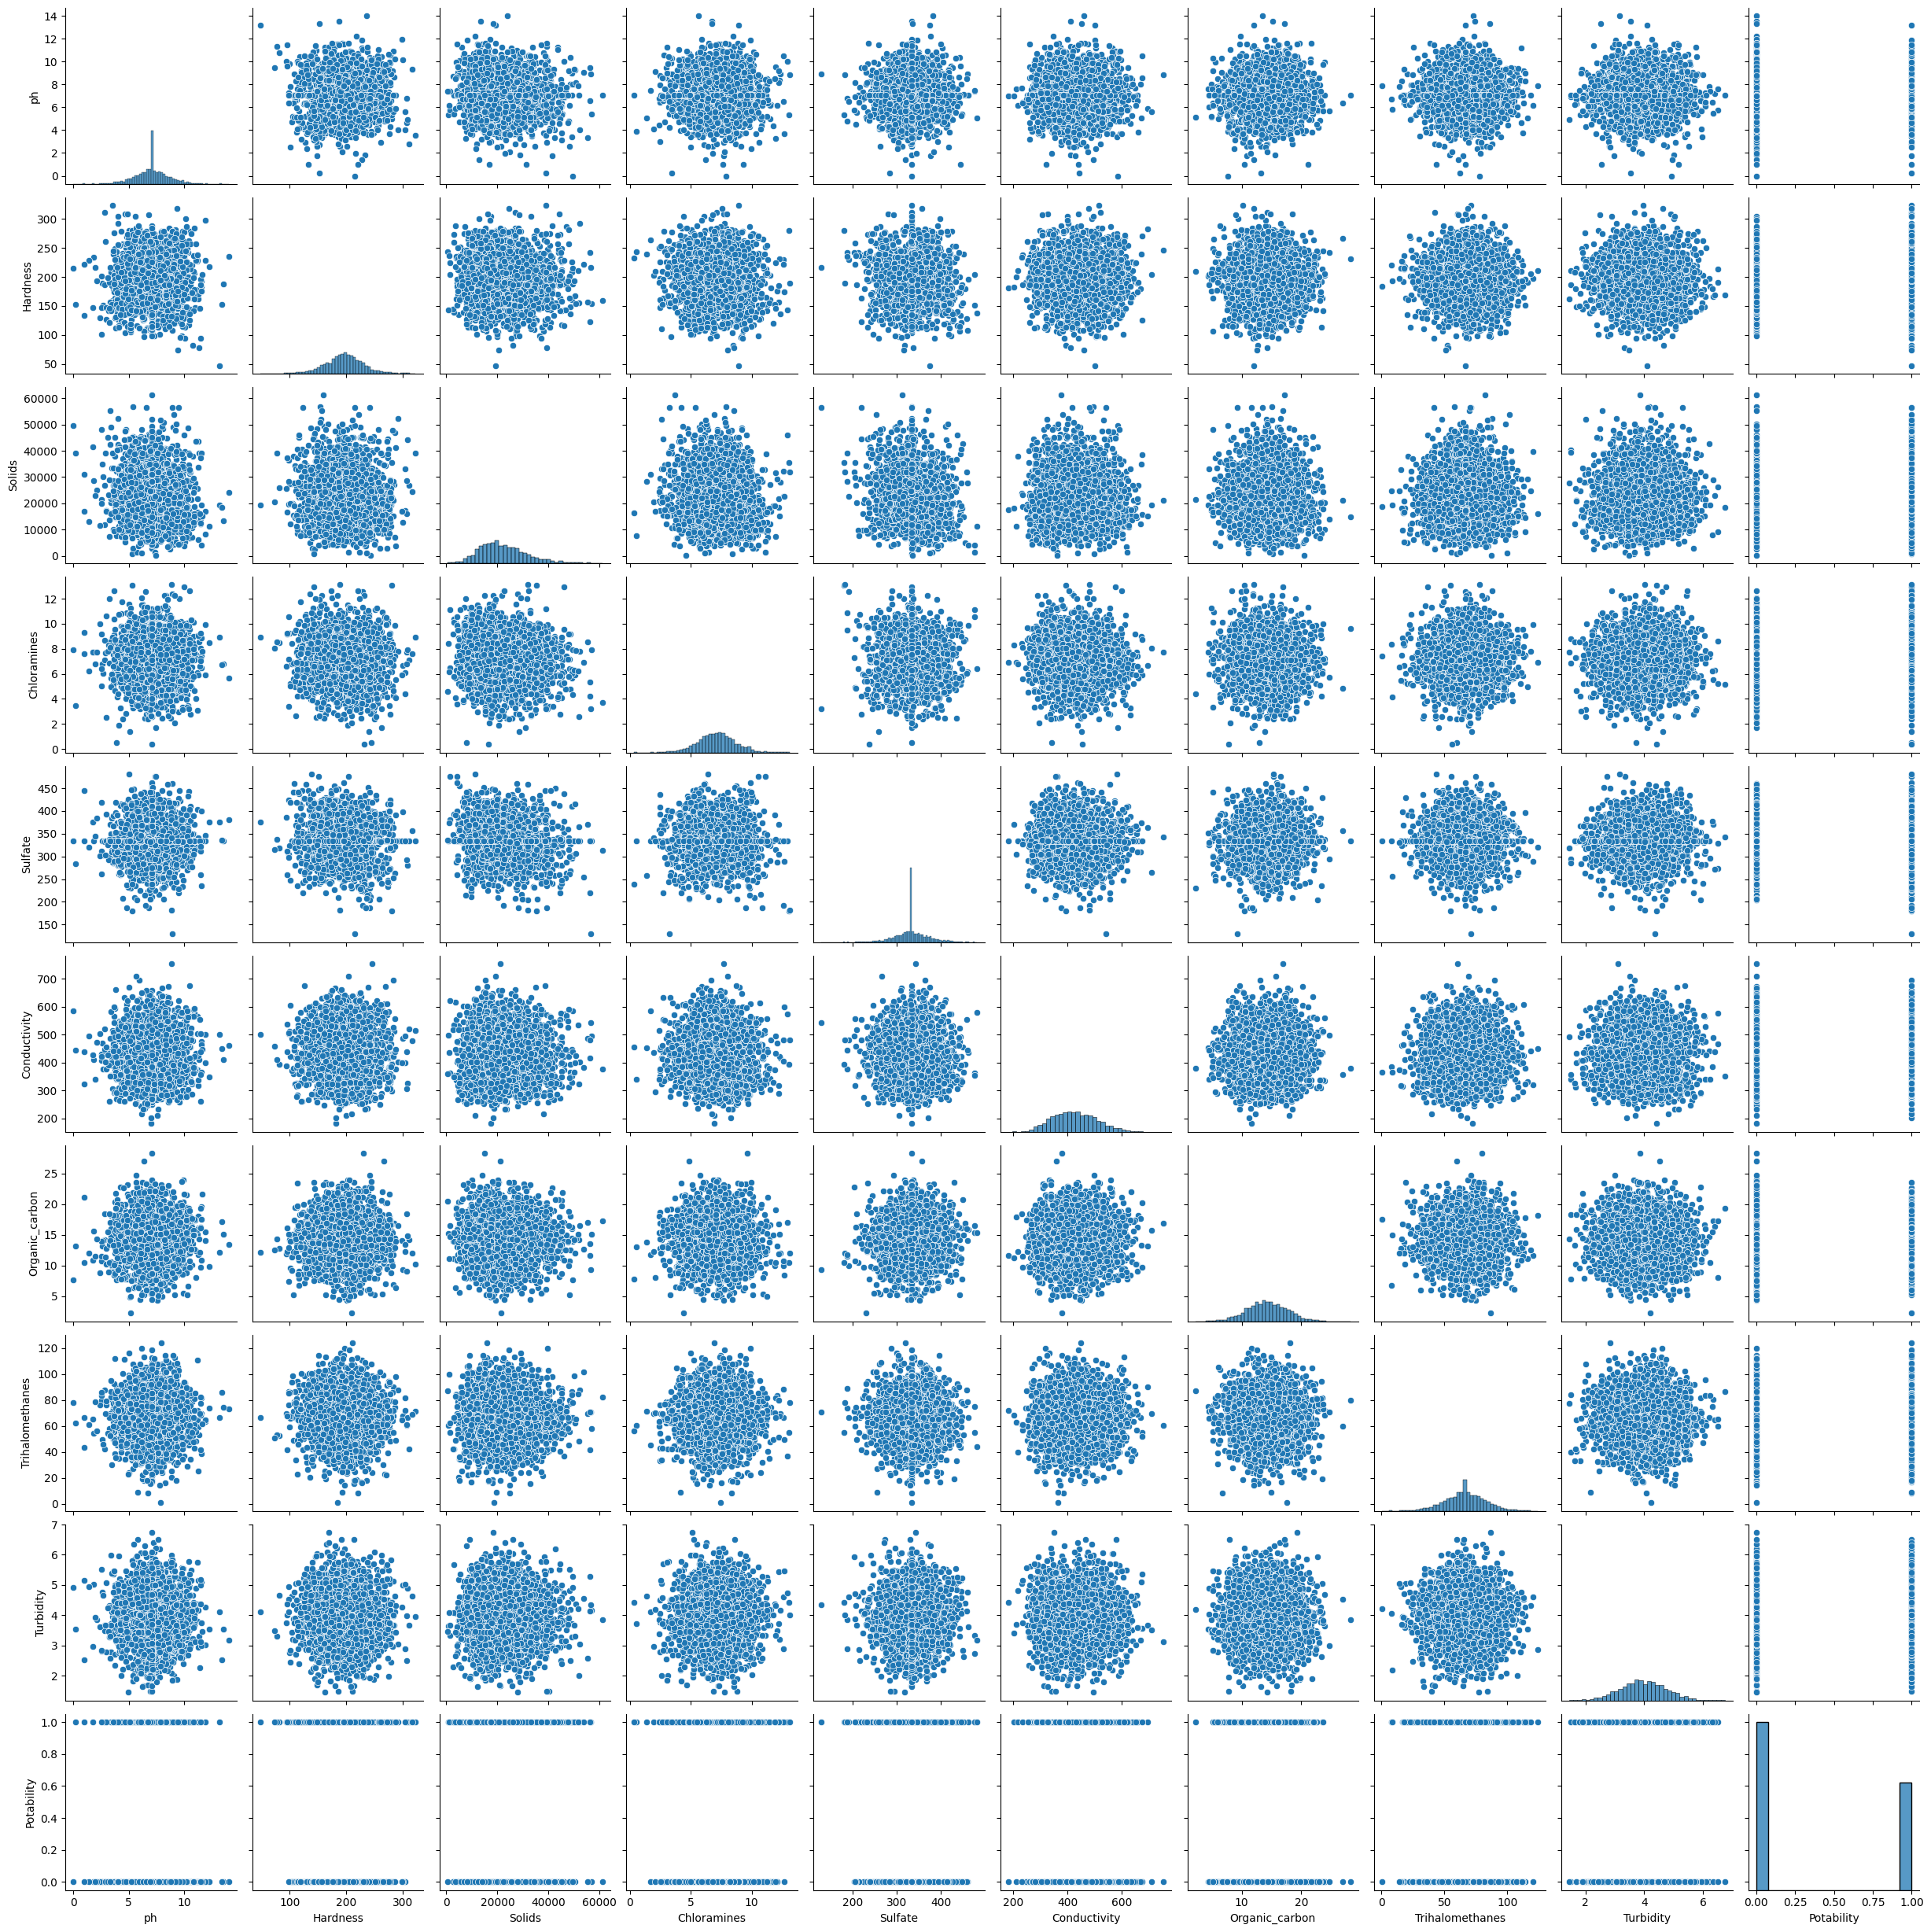

In [18]:
sns.pairplot(data)

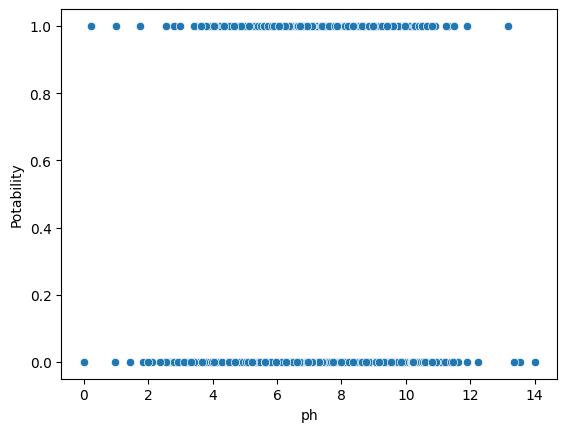

In [19]:
sns.scatterplot(x=data['ph'], y=data['Potability'])
plt.show()

In [20]:
fig = px.pie(data,names ="Potability",hole = 0.4,template ="plotly_dark")
fig.show()

In [21]:
fig = px.scatter(data,x ="ph",y="Hardness",color= "Potability",template="plotly_dark")
fig.show()
# sulfate and solids's similarity is a 0.076 and here is the distribution of those data

In [22]:
fig = px.scatter(data,x ="Organic_carbon",y="Hardness",color= "Potability",template="plotly_dark")
fig.show()
# sulfate and solids's similarity is a 0.04 and here is the distribution of those data

In [23]:
fig = px.scatter(data,x ="Sulfate",y="Solids",color= "Potability",template="plotly_dark")
fig.show() 
# sulfate and solids's similarity is a -0.15 and here is the distribution of those data

# **Partitioning**

In [24]:
X= data.drop('Potability',axis=1) #Input data is all features 

In [25]:
Y= data['Potability'] #Target Variable

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2, shuffle=True,random_state=101)
# we splited the data to make a prediction on that train data 

In [28]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
748,6.750761,207.254505,23642.992597,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726
2279,7.539742,201.959317,26716.359708,5.637350,333.775777,516.354560,14.985649,83.536821,4.210678
1960,8.128270,231.167537,19954.575554,5.138838,349.067363,386.071149,15.018085,63.340968,4.678742
1491,7.368166,204.041451,8524.874646,9.469763,429.814322,328.565288,11.173155,88.888819,3.684263
2991,6.628256,198.865743,15911.357509,7.517906,342.015924,437.918625,15.005742,38.845958,4.464457
...,...,...,...,...,...,...,...,...,...
599,7.080795,205.638790,39742.970329,4.660528,323.956492,509.546419,11.674850,55.042679,3.916746
1599,8.227083,274.351887,40546.956332,7.130161,241.446917,417.673702,9.809669,79.397105,3.619182
1361,4.906492,173.779159,14786.138901,5.843757,267.561144,620.346840,7.775896,38.794307,3.152345
1547,6.217585,203.707222,15597.640883,7.751461,361.247810,452.922025,14.597145,70.850977,4.150167


In [29]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2541,5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954
2605,8.445219,228.522860,28966.569327,6.179855,333.775777,361.705354,14.554220,60.612230,4.400706
330,6.737004,220.100102,24694.744205,8.373660,333.775777,384.308673,6.748092,8.175876,4.063170
515,5.701155,233.515043,41411.601707,5.895464,310.160545,509.767888,22.686837,73.751883,3.403136
400,6.259652,208.379430,37356.746401,8.565487,256.473839,380.240193,5.567693,68.441865,4.213405
...,...,...,...,...,...,...,...,...,...
482,7.705711,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956
2970,10.933111,162.424918,18846.634913,7.085261,333.775777,593.725764,14.977233,60.690580,3.894989
50,7.080795,168.388431,27492.307307,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057
839,7.611610,222.252269,25063.683013,8.561124,287.948123,505.265483,18.273757,68.395413,2.873261


In [30]:
Y_train

748     1
2279    0
1960    1
1491    1
2991    0
       ..
599     0
1599    1
1361    0
1547    1
863     0
Name: Potability, Length: 2620, dtype: int64

In [31]:
Y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

 # **Model Training**

# **Decision Tree**

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 3,)

In [33]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [34]:
Y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

In [35]:
Y_prediction=dt.predict(X_test) #if in Y_test 2541--> 0 is match with this data the model is correct but  first is 1   

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
accuracy_score(Y_prediction,Y_test)*100 # accuracy is a was %58 is this bad or good? Answer is it depends on a domain

59.90853658536586

In [38]:
confusion_matrix(Y_prediction,Y_test) 
#here is TP  FP  True Positive is Y test and Y prediction is 1    False Positive is Y tesi is 0 Y prediction is 1  (1= good water  0 is bad water)
#        FN  TN  False Negative is Y test is 1 Yprediction is 0   True Negative is Y test and Y prediction is 0

array([[264, 125],
       [138, 129]])

 **Try More ML Models**

# **Model Optimization /Hyper Parameter Tuning**

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt= DecisionTreeClassifier()
criterion = ["gini","entropy"]
splitter = ['best','random ']
min_samples_split=range (1,10)

parameters = dict(criterion=criterion,splitter= splitter, min_samples_split= min_samples_split)
cv= RepeatedStratifiedKFold(n_splits = 5,random_state=101) 
grid_search_cv_dt= GridSearchCV(estimator=dt, param_grid=parameters,scoring='accuracy',cv=cv)
#grid will use every parameter to decide the best
#cv is a cross validation which spliting the test to 5 pieces and compare the each other to 5 times 
#and we using together those 

In [40]:
grid_search_cv_dt.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


1000 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _v

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random ']},
             scoring='accuracy')

In [41]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'best'}


In [42]:
prediction_grid=grid_search_cv_dt.predict(X_test)

In [43]:
accuracy_score(Y_test,prediction_grid)*100

59.45121951219512